In [21]:
import pandas as pd
import config as c
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

In [22]:
data = pd.read_csv('data/runs/n_results.csv', index_col='run')
drug_data = pd.read_csv('data/runs/drug_data.csv')
new_drug_data = pd.read_csv('data/runs/new_drug.csv')

In [23]:
data = data[data['status']=='completed']
data = data[data['r_2_mean'].notnull()]

In [24]:
data['time'] = pd.to_timedelta(data['time'])
data['started'] = pd.to_datetime(data['started'])

In [25]:
data['seconds'] = data['time'].apply(lambda x:x.seconds)

In [26]:
data['datasets'] = data['gdsc']+data['ctrp']+data['ccle']

In [27]:
data = data[data['datasets']>0]

In [28]:
ndata = data[data['started'] > pd.to_datetime('2020-04-15 18:00:00')]

In [29]:
drug_data = drug_data.join(ndata, rsuffix='_drug', on='run')
drug_data = drug_data[drug_data['started'].notnull()]

In [30]:
ndrug_data = drug_data[drug_data['started'] > pd.to_datetime('2020-04-15 18:00:00')]

In [31]:
ndata.shape

(1937, 23)

In [33]:
data[(data['datasets']>1)&(data['feda'] == True)].describe()

,time,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
count,695,695.0,695.000000,692.000000,0.0,695.000000,695.0,695.000000,695.000000,695.000000
mean,0 days 01:30:35.712230,4.0,20.258993,0.095094,NaN,0.010187,0.0,-0.036622,0.041326,5311.395683
std,0 days 02:12:35.054488,0.0,2.777374,0.059794,NaN,0.003734,0.0,0.044299,0.079631,7038.656899
min,0 days 00:01:02,4.0,20.000000,0.000000,NaN,0.010000,0.0,-0.273618,0.000876,62.000000
25%,0 days 00:22:08.500000,4.0,20.000000,0.041896,NaN,0.010000,0.0,-0.055968,0.008021,1328.500000
50%,0 days 00:54:51,4.0,20.000000,0.092191,NaN,0.010000,0.0,-0.012395,0.015552,3291.000000
75%,0 days 01:50:36.500000,4.0,20.000000,0.144740,NaN,0.010000,0.0,-0.005483,0.044381,6636.500000
max,1 days 04:49:17,4.0,50.000000,0.245415,NaN,0.100000,0.0,0.000176,0.842386,63575.000000


In [34]:
drug_data = pd.concat([drug_data, new_drug_data])
full_data = drug_data.join(data, on='run', rsuffix='_drug')

/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
data.describe()

,time,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
count,2819,2820.0,2820.000000,2811.000000,0.0,2820.000000,2820.0,2820.000000,2819.000000,2819.000000
mean,0 days 00:56:40.401560,4.0,20.663475,0.099703,NaN,0.010110,0.0,0.138684,0.263361,3369.752394
std,0 days 01:31:10.591949,0.0,4.449856,0.058432,NaN,0.003029,0.0,0.494276,1.672491,5140.193487
min,0 days 00:00:35,4.0,1.000000,0.000000,NaN,0.010000,0.0,-12.995511,0.000012,35.000000
25%,0 days 00:09:54,4.0,20.000000,0.049250,NaN,0.010000,0.0,-0.013248,0.037092,594.000000
50%,0 days 00:30:00,4.0,20.000000,0.098271,NaN,0.010000,0.0,0.083728,0.118700,1800.000000
75%,0 days 01:05:48.500000,4.0,20.000000,0.148706,NaN,0.010000,0.0,0.223126,0.185232,3948.500000
max,1 days 04:49:17,4.0,50.000000,0.248831,NaN,0.100000,0.0,0.999979,58.519798,63575.000000


In [33]:
ndata[ndata['norm'].notnull()].sort_values('r_2_mean', ascending=False)

,operation,started,time,status,label,ccle,ctrp,cutoff,drugs,feda,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
run,,,,,,,,,,,,,,,,,,,,,
678f9d02,train:train,2020-04-20 14:38:41,02:23:17,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,RandomForestRegressor,0.141642,QuantileTransformer,NaN,0.01,0.0,0.394109,0.218128,8597.0,2
c817d1c1,train:train,2020-04-20 21:54:10,01:31:26,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,SVR,0.061395,QuantileTransformer,NaN,0.01,0.0,0.391546,0.176993,5486.0,2
399edb43,train:train,2020-04-22 03:37:12,01:32:16,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,ElasticNet,0.098535,QuantileTransformer,NaN,0.01,0.0,0.386600,0.218185,5536.0,2
b7b72d30,train:train,2020-04-22 23:20:03,01:42:36,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,KNeighborsRegressor,0.066072,MaxAbsScaler,NaN,0.01,0.0,0.380133,0.239234,6156.0,2
4b83ffb6,train:train,2020-04-21 18:15:44,00:50:20,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,ElasticNet,0.125826,QuantileTransformer,NaN,0.01,0.0,0.375033,0.200046,3020.0,2
7cce85ba,train:train,2020-04-25 00:53:30,02:57:31,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,KNeighborsRegressor,0.074267,MaxAbsScaler,NaN,0.01,0.0,0.373889,0.189286,10651.0,2
ccb9696c,train:train,2020-04-21 09:38:42,03:00:39,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,RandomForestRegressor,0.119352,QuantileTransformer,NaN,0.01,0.0,0.373249,0.136731,10839.0,2
83a3bd2b,train:train,2020-04-24 09:47:38,00:39:16,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,KNeighborsRegressor,0.011392,MinMaxScaler,NaN,0.01,0.0,0.363057,0.227744,2356.0,2
950ee138,train:train,2020-04-21 20:32:27,00:34:14,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,ElasticNet,0.032061,QuantileTransformer,NaN,0.01,0.0,0.360887,0.239003,2054.0,2


## FEDA t-test

In [13]:
data[data['fs']=='Lasso'][['model', 'feda','r_2_mean']]

,model,feda,r_2_mean
run,,,
acbbf2bd,KNeighborsRegressor,True,0.026389
ddc1fcee,ElasticNet,False,0.212919
f15866de,ElasticNet,False,0.038551
9fe7654e,DecisionTreeRegressor,True,-0.183967
5e7b5693,DecisionTreeRegressor,True,-0.342574
...,...,...,...
ec5e4047,DecisionTreeRegressor,False,0.999100
81ec90e7,DecisionTreeRegressor,False,0.999535
dde14bbd,DecisionTreeRegressor,False,0.999529


In [280]:
ndata[(ndata['feda']==False)&(~ndata['model'].isin(['SVR', 'ElasticNet']))]['r_2_mean'].mean()

0.11587292792107694

In [279]:
ndata[(ndata['feda']==True)&(~ndata['model'].isin(['SVR', 'ElasticNet']))]['r_2_mean'].mean()

-0.0038146281337004995

In [24]:
from scipy import stats
stats.ttest_ind(data[data['metric']=='AUC_IC50']['r_2_mean'].values, data[data['metric']!='AUC_IC50']['r_2_mean'].values)

Ttest_indResult(statistic=-0.3913970844859045, pvalue=0.6955567243773826)

In [270]:
stats.ttest_ind(ndata[ndata['feda']==True]['r_2_mean'].values, ndata[ndata['feda']==False]['r_2_mean'].values, equal_var=False)

Ttest_indResult(statistic=-9.375550795860045, pvalue=5.019565164007916e-19)

## Model composition

In [15]:
models = data.groupby('model').mean()
models['Number of runs'] = [data[data['model']==i].shape[0] for i in models.index]
models

,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds,Number of runs
model,,,,,,,,,,
DecisionTreeRegressor,4.0,19.961616,0.096877,NaN,0.010000,0.0,0.175909,0.184037,2027.828283,495
ElasticNet,4.0,20.000000,0.095670,NaN,0.010000,0.0,0.116151,0.107175,2236.716157,916
KNeighborsRegressor,4.0,20.000000,0.092033,NaN,0.010000,0.0,0.119621,0.106173,9850.083333,288
RandomForestRegressor,4.0,20.000000,0.094340,NaN,0.010000,0.0,0.294086,0.092262,4389.613020,553
SVR,4.0,23.327465,0.118070,NaN,0.010546,0.0,0.000950,0.830511,2085.440917,568


In [16]:
ndata[ndata['norm'].notnull()].shape

(923, 23)

In [17]:
nmodels = data[data['started'] > pd.to_datetime('2020-04-15 18:00:00')].groupby('model').mean()
nmodels['Number of runs'] = [data[(data['model']==i) & (data['started'] > pd.to_datetime('2020-04-15 18:00:00'))].shape[0] for i in nmodels.index]
nmodels

,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds,Number of runs
model,,,,,,,,,,
DecisionTreeRegressor,4.0,20.0,0.095266,NaN,0.01,0.0,-0.077297,0.253204,1990.424615,325
ElasticNet,4.0,20.0,0.093522,NaN,0.01,0.0,0.091800,0.097221,2544.857651,562
KNeighborsRegressor,4.0,20.0,0.093337,NaN,0.01,0.0,0.102191,0.108939,10295.411321,265
RandomForestRegressor,4.0,20.0,0.090055,NaN,0.01,0.0,0.117742,0.116893,4417.362069,406
SVR,4.0,20.0,0.112966,NaN,0.01,0.0,-0.070615,0.697170,2163.361478,379


In [18]:
ndata.groupby('datasets').max()

,operation,started,time,status,label,ccle,ctrp,cutoff,drugs,feda,...,gdsc,metric,model,n,test,threshold,step,r_2_mean,r_2_std,seconds
datasets,,,,,,,,,,,,,,,,,,,,,
1,train:train,2020-04-29 14:56:20,0 days 15:11:42,completed,ccle=yes ctrp=no cutoff=4 drugs=20 feda=yes fs...,True,True,4.0,20.0,True,...,True,AUC_IC50,SVR,0.199592,NaN,0.01,0.0,0.221530,42.588642,54702.0
2,train:train,2020-04-29 13:22:49,1 days 04:49:17,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,True,AUC_IC50,SVR,0.199802,NaN,0.01,0.0,0.409924,1.295494,63575.0
3,train:train,2020-04-29 14:28:55,0 days 17:16:36,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,True,AUC_IC50,SVR,0.199700,NaN,0.01,0.0,0.273208,0.354959,62196.0


In [52]:
norm = ndata.groupby(['model', 'norm']).max()
norm['Number of runs'] = [ndata[(ndata['model']==i[0])&(ndata['norm']==i[1])].shape[0] for i in norm.index]

In [54]:
norm.loc['SVR', 'QuantileTransformer']

operation                                               train:train
started                                         2020-04-20 21:54:10
time                                                0 days 01:31:26
status                                                    completed
label             ccle=yes ctrp=yes cutoff=4 drugs=20 feda=no fs...
ccle                                                           True
ctrp                                                           True
cutoff                                                            4
drugs                                                            20
feda                                                           True
fs                                           mutual_info_regression
gdsc                                                           True
metric                                                     AUC_IC50
n                                                         0.0802049
test                                            

In [25]:
stats.ttest_ind(ndata[ndata['norm'].notnull()]['r_2_mean'].values, ndata[~ndata['norm'].notnull()]['r_2_mean'].values, equal_var=False)

Ttest_indResult(statistic=-1.8743103650682442, pvalue=0.062111994287563865)

## Per model

In [283]:
ndata[(ndata['feda']==True)&(ndata['datasets']>1)].sort_values('r_2_mean', ascending=False)

,operation,started,time,status,label,ccle,ctrp,cutoff,drugs,feda,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
run,,,,,,,,,,,,,,,,,,,,,
0d238804,train:train,2020-04-16 05:51:03,01:40:36,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.159352,NaN,NaN,0.01,0.0,-0.001914,0.001383,6036.0,3
51241a74,train:train,2020-04-17 02:59:27,00:15:25,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.031760,NaN,NaN,0.01,0.0,-0.002197,0.002287,925.0,2
0b35dc5d,train:train,2020-04-16 04:46:41,01:41:16,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.129060,NaN,NaN,0.01,0.0,-0.002357,0.002823,6076.0,2
5ff47509,train:train,2020-04-16 01:48:47,01:05:08,completed,ccle=yes ctrp=no cutoff=4 drugs=20 feda=yes fs...,True,False,4.0,20.0,True,...,ElasticNet,0.120254,NaN,NaN,0.01,0.0,-0.002631,0.002777,3908.0,2
a2001ef9,train:train,2020-04-16 05:06:57,03:58:31,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=yes fs...,False,True,4.0,20.0,True,...,RandomForestRegressor,0.160064,NaN,NaN,0.01,0.0,-0.003089,0.007976,14311.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7cca510a,train:train,2020-04-18 13:07:13,00:44:52,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,SVR,0.023019,NaN,NaN,0.01,0.0,-0.142764,0.272121,2692.0,2
26d60d3b,train:train,2020-04-19 17:20:57,00:48:47,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,DecisionTreeRegressor,0.009347,NaN,NaN,0.01,0.0,-0.146341,0.282566,2927.0,2
9e0cc091,train:train,2020-04-19 17:56:20,02:35:00,completed,ccle=yes ctrp=no cutoff=4 drugs=20 feda=yes fs...,True,False,4.0,20.0,True,...,DecisionTreeRegressor,0.172456,NaN,NaN,0.01,0.0,-0.148571,0.111783,9300.0,2


In [285]:
ndata.loc['51241a74']['label']

'ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes fs=Lasso gdsc=no metric=AUC_IC50 model=ElasticNet n=0.03176 threshold=0.01'

## Individual drug analysis

In [121]:
svr = data[(data['model'] == 'SVR') & (data['r_2_mean']>0)]
svr[svr['r_2_mean']> 0.6][['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
c84c194d,False,0.010000,ElasticNet,0.934915
8071f94a,False,0.094795,DecisionTreeRegressor,0.922619
400d39b7,False,0.098271,DecisionTreeRegressor,0.922580
d2703cd1,False,0.147682,mutual_info_regression,0.919401
dfde6ba7,False,0.072084,mutual_info_regression,0.917935
c889fa24,False,0.087590,f_regression,0.916772
b1cea166,False,0.003354,mutual_info_regression,0.901983
e32273a7,False,0.144099,ElasticNet,0.897122
9cabe208,False,0.057282,RandomForestRegressor,0.887763


In [122]:
en = data[(data['model'] == 'ElasticNet') & (data['r_2_mean']>0)]
en[['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
150587db,False,0.100081,mutual_info_regression,0.541867
140511c0,False,0.006392,DecisionTreeRegressor,0.502989
61f79f6a,False,0.146809,DecisionTreeRegressor,0.499752
a0fd39fd,False,0.161861,DecisionTreeRegressor,0.479983
d122f81c,True,0.002680,DecisionTreeRegressor,0.445192
...,...,...,...,...
ae6aad99,True,0.083612,f_regression,0.030006
30aec5a1,True,0.172041,mutual_info_regression,0.029708
c7025afd,False,0.025666,RandomForestRegressor,0.021164


In [123]:
dt = data[(data['model'] == 'DecisionTreeRegressor') & (data['r_2_mean']>0)]
dt[['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
bb21f1a1,False,0.178835,Lasso,0.999979
ffb505bc,False,0.029654,Lasso,0.999978
8ee1461e,False,0.000266,Lasso,0.999976
62069de6,False,0.132054,Lasso,0.999972
43650dda,False,0.073360,Lasso,0.999966
...,...,...,...,...
25e24ad2,False,0.117603,RandomForestRegressor,0.110713
b54c0127,False,0.109115,ElasticNet,0.100940
1ea7b30d,False,0.018304,ElasticNet,0.056617


In [41]:
from config import guild
def append(data, run):
    result = pd.DataFrame()
    run = [i for i in run if i not in data['run'].values]
    print(len(run))
    for a in run:
        f = subprocess.run("guild select " +a, shell=True, capture_output=True)
        d = pd.read_csv(guild+'runs/'+f.stdout.decode('utf-8')[:-1]+'/scores.csv')
        d['run'] = [a for i in range(0, d.shape[0])]
        d = d.set_index('run')
        result = pd.concat([result, d])
        
        if len(result) % 100 == 0:
            new = pd.concat([data, result])
            print('Drug data length is {}'.format(len(new)))
            new.to_csv('new_drug')
    new = pd.concat([data, result])
    print('Drug data length is {}'.format(len(new)))
    new.to_csv('new_drug')
    return result

In [ ]:
%%time
k = append(full_data, ndata.index)

688


/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [ ]:
ndata.loc['3f9d1cab']

In [ ]:
no = pd.read_csv('data/runs/drug_data.csv')
lo = pd.concat([no, k])

In [ ]:
k

In [ ]:
k.to_csv('new_drug.csv')

In [ ]:
k.shape

In [60]:
no = pd.read_csv('data/runs/drug_data.csv')
no = no.join(ndata, rsuffix='_drug')

,run,Unnamed: 0,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,algorithm,leaf_size,metric,metric_params,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
0,46efb220,17-AAG,0.048576,0.182631,0.050794,0.160040,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46efb220,Crizotinib,-0.054589,0.318273,0.120567,0.345793,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46efb220,Erlotinib,0.054720,0.163415,0.044111,0.138618,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46efb220,L-685458,0.024931,0.104633,0.025981,0.070908,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46efb220,Lapatinib,0.003609,0.186385,0.054420,0.165393,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,30f1586e,Paclitaxel,0.417166,0.177412,0.056626,0.123328,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5071,30f1586e,Saracatinib,0.166791,0.143612,0.033232,0.113486,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5072,30f1586e,Selumetinib,0.290452,0.147707,0.038296,0.112335,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5073,30f1586e,Sorafenib,0.103364,0.112843,0.022993,0.078590,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Influence of n on r2 mean
By changing `col` and `hue` to 'fs' one can see the impact depending on the feature selection model use

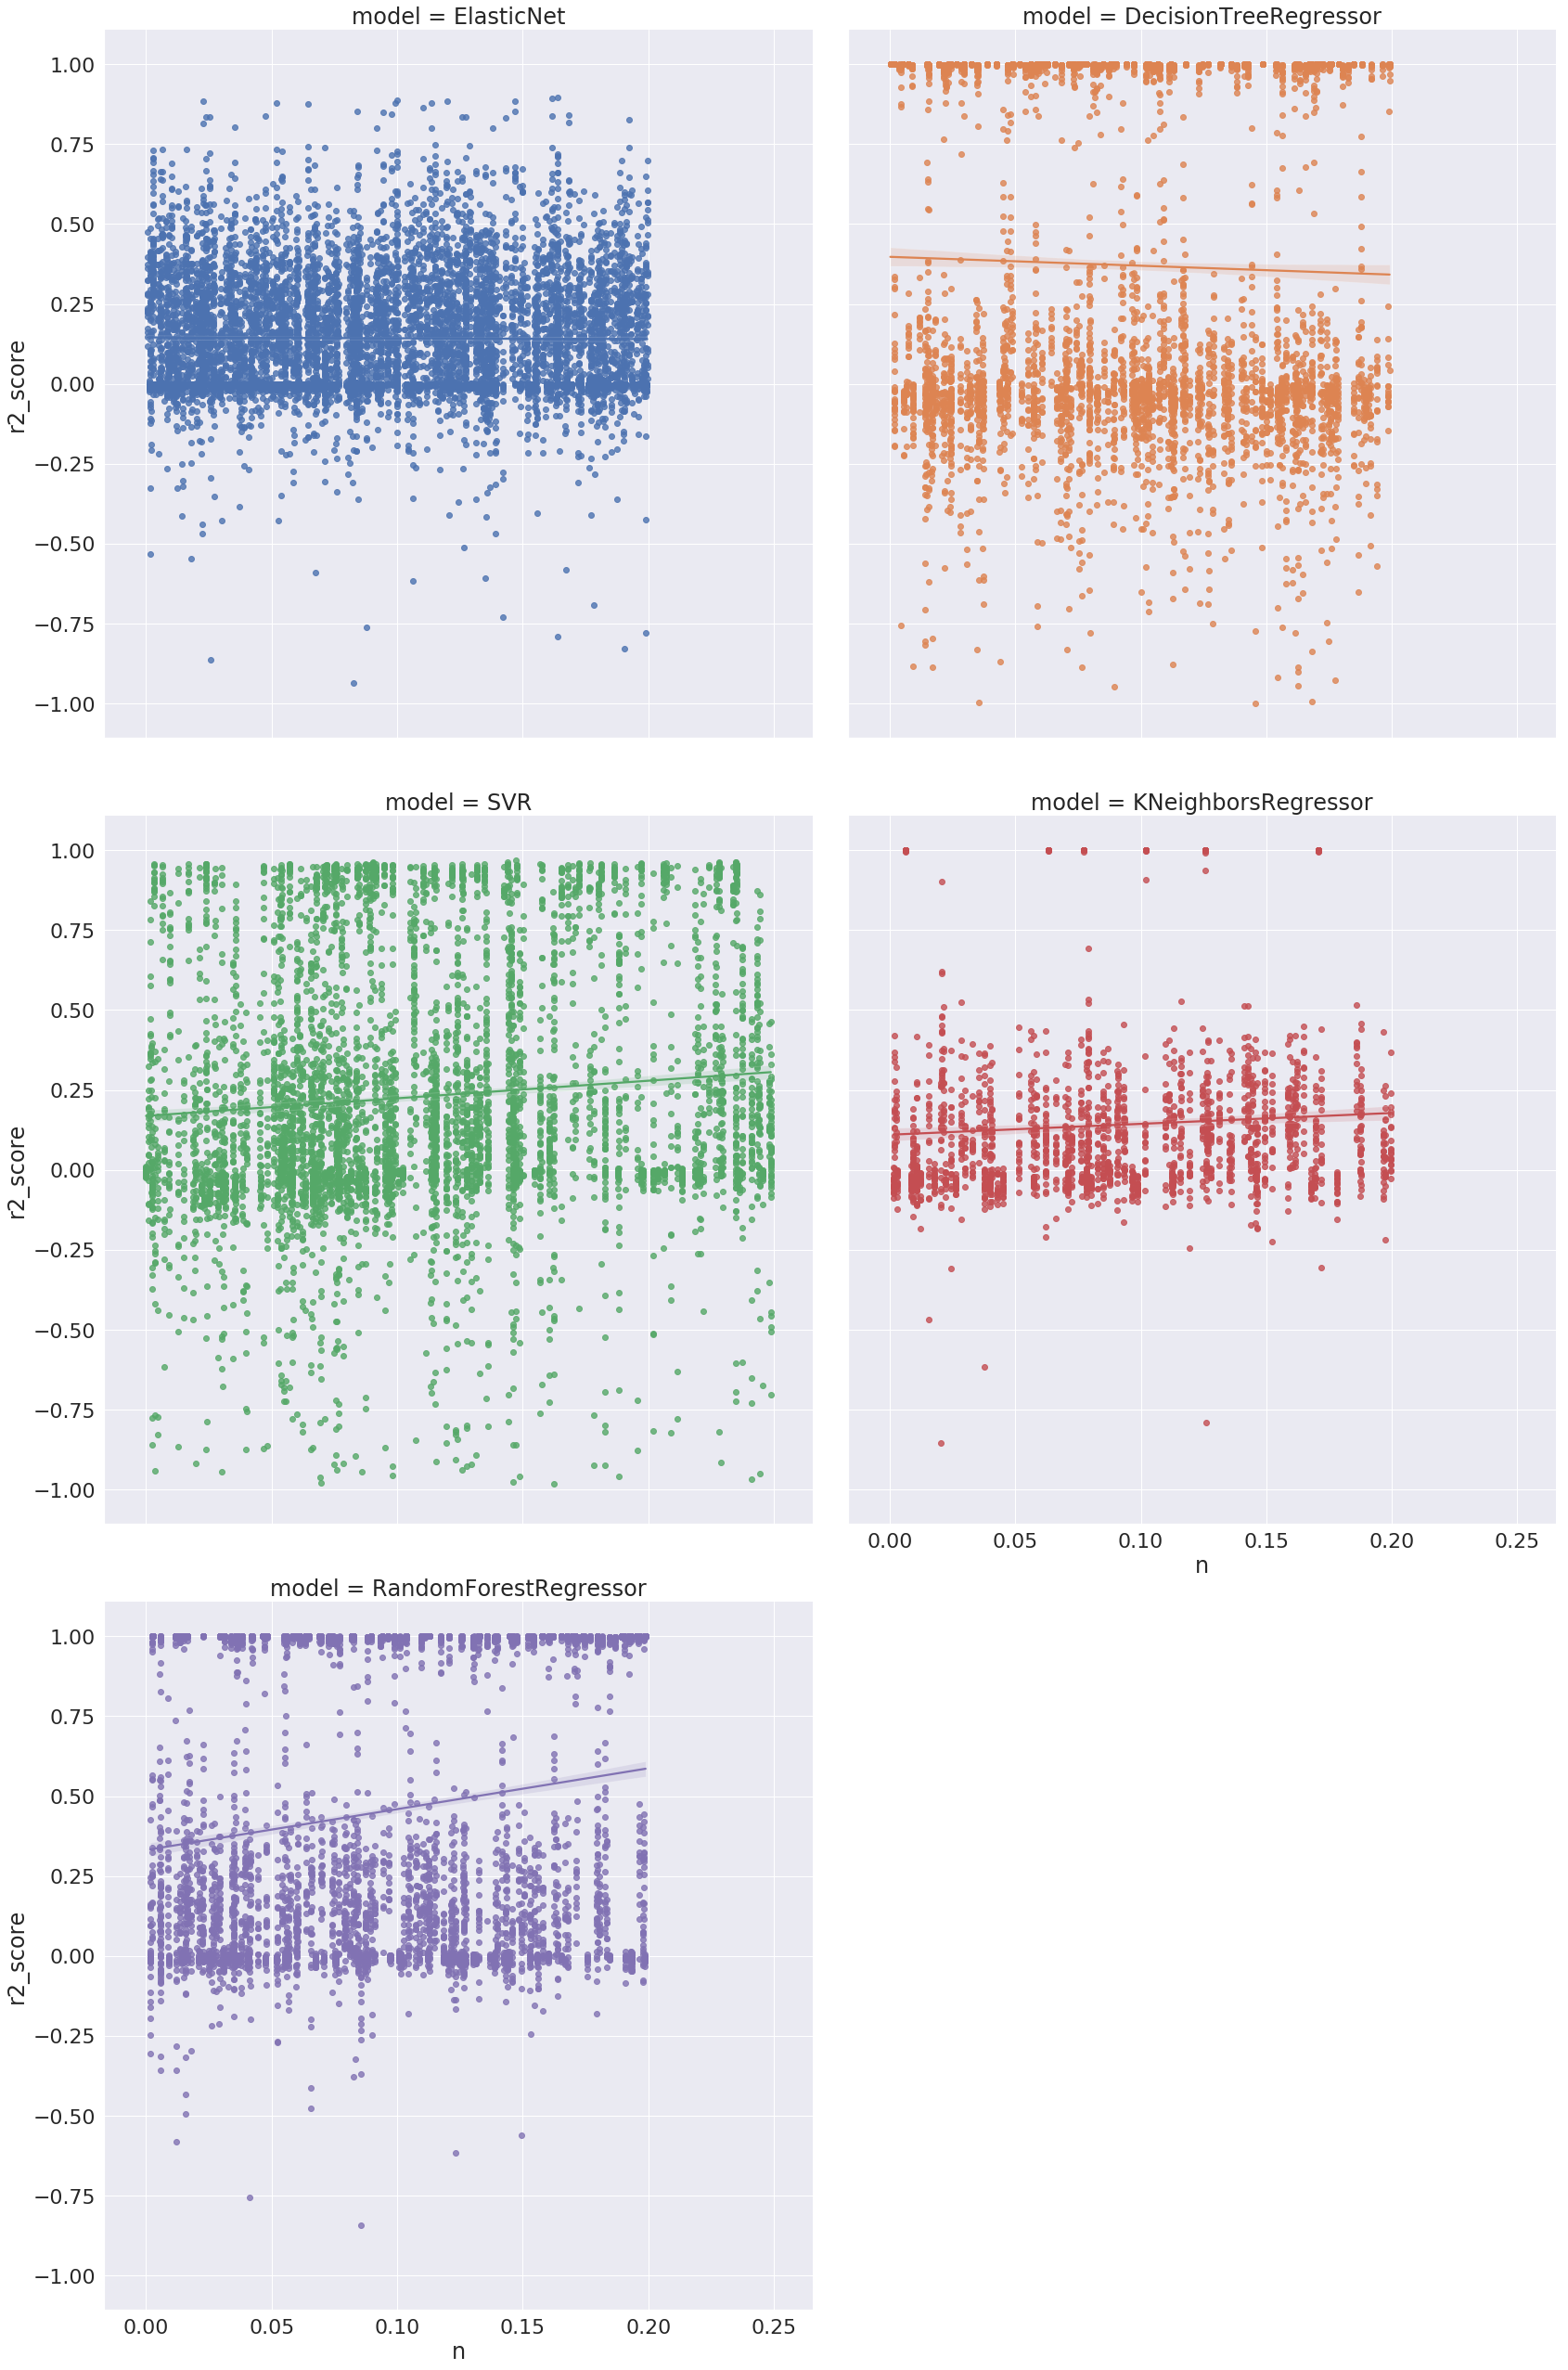

In [38]:
sns.set(font_scale=2)
g = sns.lmplot(x='n', y='r2_score', data=drug_data[drug_data['r2_score']>-1], col='model', hue='model', col_wrap=2, height=12, legend=False)
#plt.savefig('model vs n')

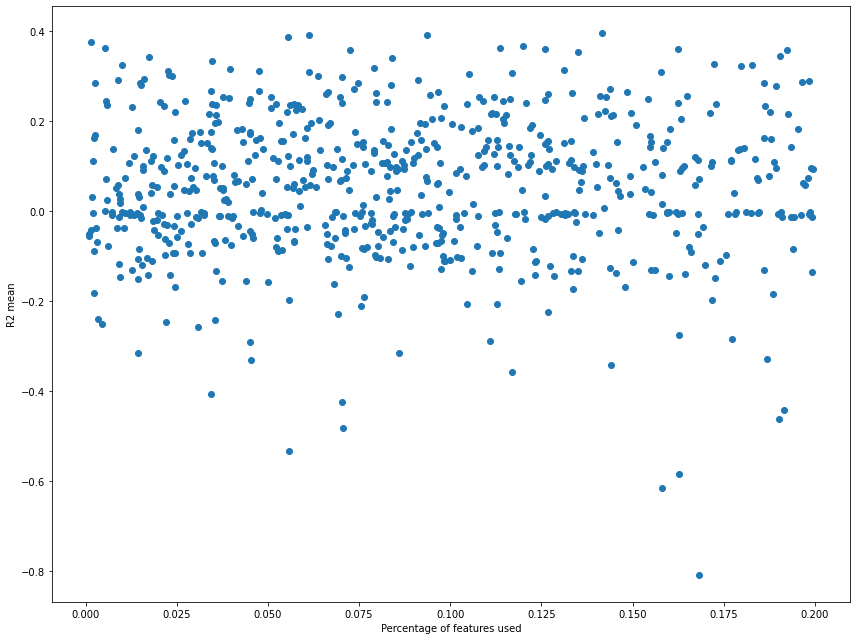

In [104]:
fig, ax = plt.subplots(figsize = (12,9))
ax.scatter(ndata[ndata['r_2_mean']>-10]['n'], ndata[ndata['r_2_mean']>-10]['r_2_mean'])
ax.set_xlabel('Percentage of features used')
ax.set_ylabel('R2 mean')
plt.tight_layout()
#plt.savefig('Features vs r2')

## Violinplots of r2 per model and per Drug (using the top-10 most common)

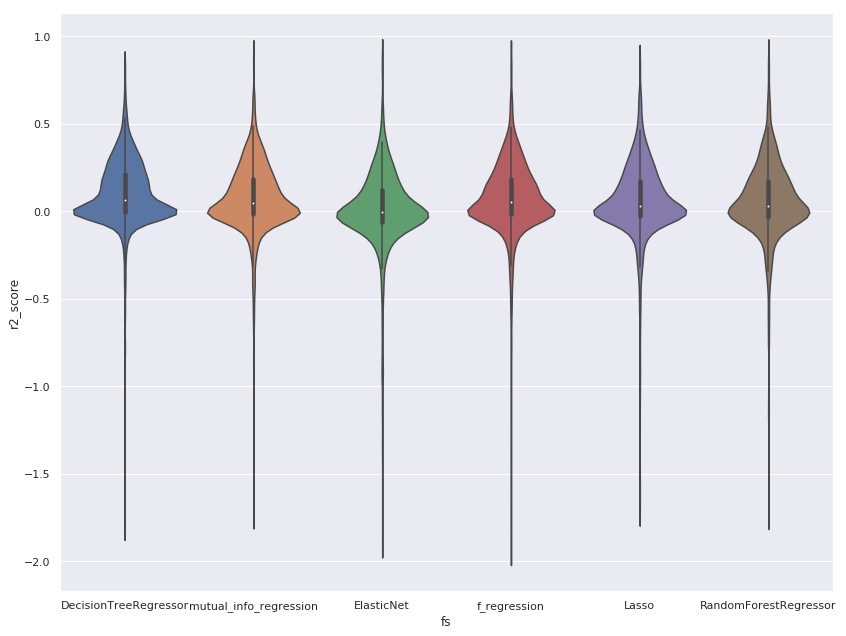

In [106]:
sns.set()
plt.figure(figsize = (12,9))
ax = sns.violinplot(x=ndrug_data[ndrug_data['r2_score']>-2]['fs'], y = ndrug_data['r2_score'])
plt.tight_layout()
#plt.savefig('model.png')

In [108]:
from collections import Counter
count = Counter(ndrug_data['Unnamed: 0'])

def getDrugs(n):
    return [i[0] for i in count.most_common(n)]

In [110]:
jo = ndrug_data[ndrug_data['Unnamed: 0'].isin(getDrugs(10))]

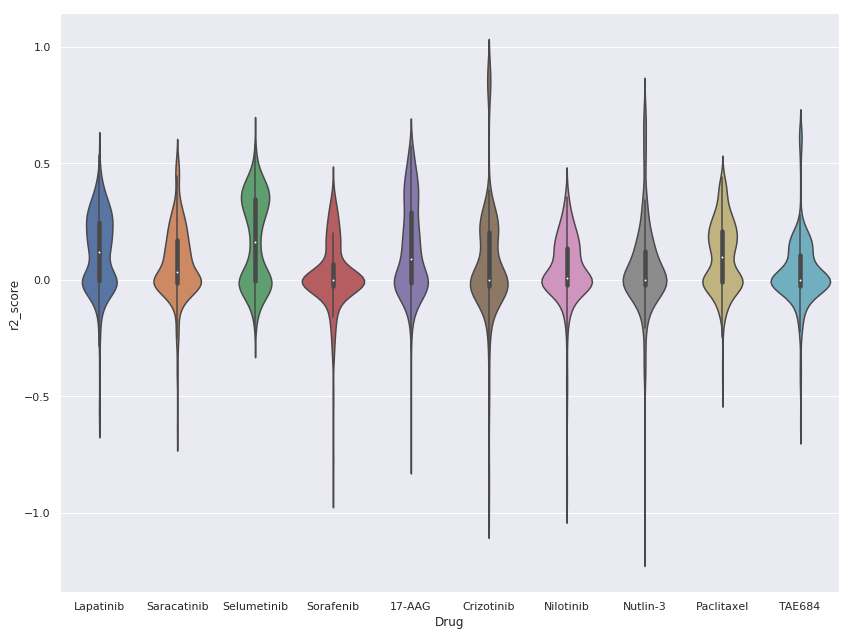

In [111]:
plt.figure(figsize = (12,9))
ax = sns.violinplot(x=jo['Unnamed: 0'], y = jo['r2_score'])
ax.set_xlabel('Drug')
plt.tight_layout()
#plt.savefig('drugs.png')

In [187]:
lo = k.join(ndata, lsuffix='n')

In [78]:
lo.groupby('model').mean()

,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,alpha,l1_ratio,max_iter,random_state,tol,max_depth,...,epsilon,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
model,,,,,,,,,,,,,,,,,,,,,
DecisionTreeRegressor,-0.094432,0.165591,0.049621,0.138739,NaN,NaN,NaN,NaN,NaN,2.518900,...,NaN,4.0,20.0,0.090949,NaN,0.01,0.0,-0.094432,0.338541,3467.963918
ElasticNet,0.109282,0.152390,0.040928,0.135200,2.924088,0.108212,5000.0,NaN,0.0001,NaN,...,NaN,4.0,20.0,0.092379,NaN,0.01,0.0,0.109282,0.121841,2296.259854
KNeighborsRegressor,0.068197,0.152170,0.042126,0.131089,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,20.0,0.094594,NaN,0.01,0.0,0.068197,0.107072,10402.251889
RandomForestRegressor,0.108255,0.161446,0.044138,0.143393,NaN,NaN,NaN,NaN,NaN,4.345299,...,NaN,4.0,20.0,0.079032,NaN,0.01,0.0,0.108255,0.092693,4008.966154
SVR,0.015268,0.160099,0.044577,0.137407,NaN,NaN,-1.0,NaN,0.0010,NaN,...,0.1,4.0,20.0,0.067049,NaN,0.01,0.0,0.015268,0.295948,1913.851003
